In [99]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 用SciKit-Learn套件做KNN模型分析

In [44]:
df = pd.read_csv("airline.csv")

In [45]:
df.head()

,user_id,is_loyal,depart_on_time,arrive_on_time,register_method,register_rate,class,seat_rate,meal_rate,flight_rate,...,tv_ad,youtube_ad_1,youtube_ad_2,youtube_ad_3,dm_message,dm_post,dm_email,credit_card_vendor,credit_card_bonus,coupon
0,00411460f7c92d2124a67ea0f4cb5f85,Satisfied,1,1,phone,3,3,3,3,3,...,1,0,1,0,0,0,0,Vendor A,2,196.7
1,006f52e9102a8d3be2fe5614f42ba989,Satisfied,0,0,mobile_app,2,2,4,4,2,...,1,0,0,0,1,1,0,Vendor A,3,53.6
2,00ac8ed3b4327bdd4ebbebcb2ba10a00,Unsatisfied,1,1,others,4,3,1,3,2,...,0,1,1,1,1,0,1,Vendor C,1,107.8
3,00ec53c4682d36f5c4359f4ae7bd7ba1,Unsatisfied,0,0,others,3,3,1,2,2,...,1,1,1,1,1,0,1,Vendor B,2,37.5
4,01161aaa0b6d1345dd8fe4e481144d84,Satisfied,1,1,phone,4,2,4,4,5,...,1,0,0,1,1,0,0,Vendor B,1,43.3


In [46]:
#刪除user_id
df.drop("user_id", axis = 1, inplace = True)

In [47]:
#轉換有階層的類別型資料為數字
size_mapping = {
           'Vendor A': 1,
           'Vendor B': 2,
           'Vendor C': 3}
df['credit_card_vendor'] = df['credit_card_vendor'].map(size_mapping)

#轉換無階層的類別型資料為dummy
from sklearn.preprocessing import OneHotEncoder
pf = pd.get_dummies(df[['register_method']])
df = pd.concat([df, pf], axis=1)
df.drop(['register_method'], axis=1, inplace=True)

In [48]:
df.head()

,is_loyal,depart_on_time,arrive_on_time,register_rate,class,seat_rate,meal_rate,flight_rate,package_rate,tv_ad,...,dm_message,dm_post,dm_email,credit_card_vendor,credit_card_bonus,coupon,register_method_mobile_app,register_method_others,register_method_phone,register_method_website
0,Satisfied,1,1,3,3,3,3,3,3,1,...,0,0,0,1,2,196.7,0,0,1,0
1,Satisfied,0,0,2,2,4,4,2,4,1,...,1,1,0,1,3,53.6,1,0,0,0
2,Unsatisfied,1,1,4,3,1,3,2,2,0,...,1,0,1,3,1,107.8,0,1,0,0
3,Unsatisfied,0,0,3,3,1,2,2,3,1,...,1,0,1,2,2,37.5,0,1,0,0
4,Satisfied,1,1,4,2,4,4,5,3,1,...,1,0,0,2,1,43.3,0,0,1,0


In [49]:
#標準化數據
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #開標準化學習機
scaler.fit(df.drop("is_loyal", axis=1)) #把除了目標y值以外的特徵丟進去訓練
scaled_features = scaler.transform(df.drop("is_loyal", axis=1)) #學習
df_feat = pd.DataFrame(scaled_features, columns=df.columns[1:])
df_feat.head()

,depart_on_time,arrive_on_time,register_rate,class,seat_rate,meal_rate,flight_rate,package_rate,tv_ad,youtube_ad_1,...,dm_message,dm_post,dm_email,credit_card_vendor,credit_card_bonus,coupon,register_method_mobile_app,register_method_others,register_method_phone,register_method_website
0,0.549621,0.673415,-0.007582,0.649602,0.442676,0.448914,0.233828,0.210924,1.387075,-0.700224,...,-0.589668,-0.465344,-0.791212,-1.499589,-0.041876,1.697538,-0.308691,-1.313315,2.418536,-0.393363
1,-1.819435,-1.484967,-0.850057,-0.958323,1.533010,1.692442,-0.672482,1.416202,1.387075,-0.700224,...,1.695868,2.148948,-0.791212,-1.499589,1.005029,-0.736370,3.239483,-1.313315,-0.413473,-0.393363
2,0.549621,0.673415,0.834893,0.649602,-1.737993,0.448914,-0.672482,-0.994355,-0.720942,1.428115,...,1.695868,-0.465344,1.263884,1.202373,-1.088781,0.185487,-0.308691,0.761432,-0.413473,-0.393363
3,-1.819435,-1.484967,-0.007582,0.649602,-1.737993,-0.794614,-0.672482,0.210924,1.387075,1.428115,...,1.695868,-0.465344,1.263884,-0.148608,-0.041876,-1.010206,-0.308691,0.761432,-0.413473,-0.393363
4,0.549621,0.673415,0.834893,-0.958323,1.533010,1.692442,2.046449,0.210924,1.387075,-0.700224,...,1.695868,-0.465344,-0.791212,-0.148608,-1.088781,-0.911557,-0.308691,-1.313315,2.418536,-0.393363


In [53]:
#製作訓練集與測試集

from sklearn.model_selection import train_test_split

x = df_feat
y = df["is_loyal"]
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.20,
                                                    random_state=0)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=i) #開學習機
    knn.fit(x_train,y_train) #訓練
    pred_i = knn.predict(x_test) #預測
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

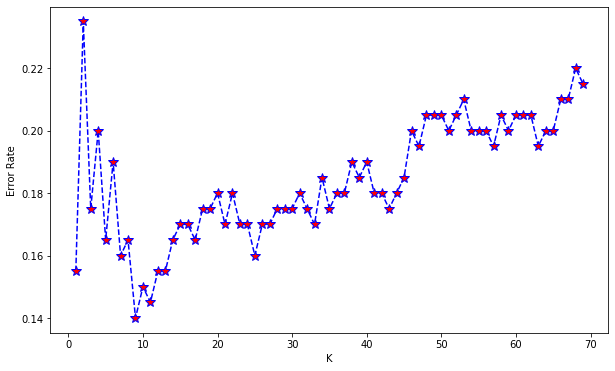

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed',
         marker='*',markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
#使用K=1訓練模型

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred_1 = knn.predict(x_test)

print("使用 K=1：")
print('\n')
print("結果報告：")
print(classification_report(y_test,pred_1))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,pred_1))
print('\n')
print("準確率：")
print((113+56)/(113+12+19+56))

使用 K=1：


結果報告：
              precision    recall  f1-score   support

   Satisfied       0.86      0.90      0.88       125
 Unsatisfied       0.82      0.75      0.78        75

    accuracy                           0.84       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.84      0.84       200



混淆矩陣：
[[113  12]
 [ 19  56]]


準確率：
0.845


In [98]:
#使用K=9(Error Rate最低點)訓練模型

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
pred_9 = knn.predict(x_test)

print("使用 K=9：")
print('\n')
print("結果報告：")
print(classification_report(y_test,pred_9))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,pred_9))
print('\n')
print("準確率：")
print((120+52)/(120+5+23+52))

使用 K=9：


結果報告：
              precision    recall  f1-score   support

   Satisfied       0.84      0.96      0.90       125
 Unsatisfied       0.91      0.69      0.79        75

    accuracy                           0.86       200
   macro avg       0.88      0.83      0.84       200
weighted avg       0.87      0.86      0.86       200



混淆矩陣：
[[120   5]
 [ 23  52]]


準確率：
0.86
